#Library Imports

In [ ]:
#setting up libraries and mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#game analytics!
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 1. Analyzing the NFL games

The first dataset that we will be looking at is the one containing information about the NFL games. Such kind of datasets are very helpful in giving us an idea about how a sport's season was/will be played out.


This dataset contains the following information:

- gameId: Game identifier, unique (numeric)

- gameDate: Game Date (time, mm/dd/yyyy)

- gameTimeEastern: Start time of game (time, HH:MM:SS, EST)

- homeTeamAbbr: Home team three-letter code (text)

- visitorTeamAbbr: Visiting team three-letter code (text)

- week: Week of game (numeric)

In [99]:
# Reading importantn the CSV file as a DataFrame
games_df = pd.read_csv('/content/drive/MyDrive/Battle of The Brains/tech/games.csv')

In [100]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


**Let us look at the shape of the DataFrame to determine how many games were played out in the 2018 NFL season.**

In [101]:
# Viewing the shape of the DataFrame
games_df.shape

(253, 6)

**Before we begin our analysis, let us convert the date and time columns to Pandas datetime values.**

**This will help to standarize such data across the multiple datasets that we work with and it will also help us use ready-made functions.**

In [102]:
# Converting to datetime.date values
games_df['gameDate'] = pd.to_datetime(games_df['gameDate']).dt.date

# Converting to datetime.time values
games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern']).dt.time

# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


**Now, let us understand how the games are distributed in accordance to the date, time, day and the week**

**Starting the analysis by looking at the distribution of games in relation to the game dates.**

In [103]:
# Checking the frequency of games in relation to game dates
# games_df['gameDate'].value_counts().reset_index()

games_df['gameDate'].value_counts().reset_index()

,index,gameDate
0,2018-12-30,16
1,2018-12-02,14
2,2018-09-16,14
3,2018-09-23,14
4,2018-12-09,14
5,2018-09-30,13
6,2018-12-23,13
7,2018-10-14,13
8,2018-10-07,13
9,2018-11-11,12


**There were a total of 50 different game dates.**

In [104]:
# Checking the frequency of games in relation to game dates
date_dist = games_df['gameDate'].value_counts().reset_index()

# Renaming the columns
date_dist.columns = ['date', 'frequency']

# Looking at the first five rows
date_dist.head()

,date,frequency
0,2018-12-30,16
1,2018-12-02,14
2,2018-09-16,14
3,2018-09-23,14
4,2018-12-09,14


**Next, sorting the data based on the date and setting the index as the date.**

In [105]:
# Sorting the DataFrame based on the date values
sorted_date_dist = date_dist.sort_values('date').set_index('date')

# Looking at the first five rows
sorted_date_dist.head()

,frequency
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14


**Let us plot the distribution using a bar plot.**

<Axes: xlabel='date'>

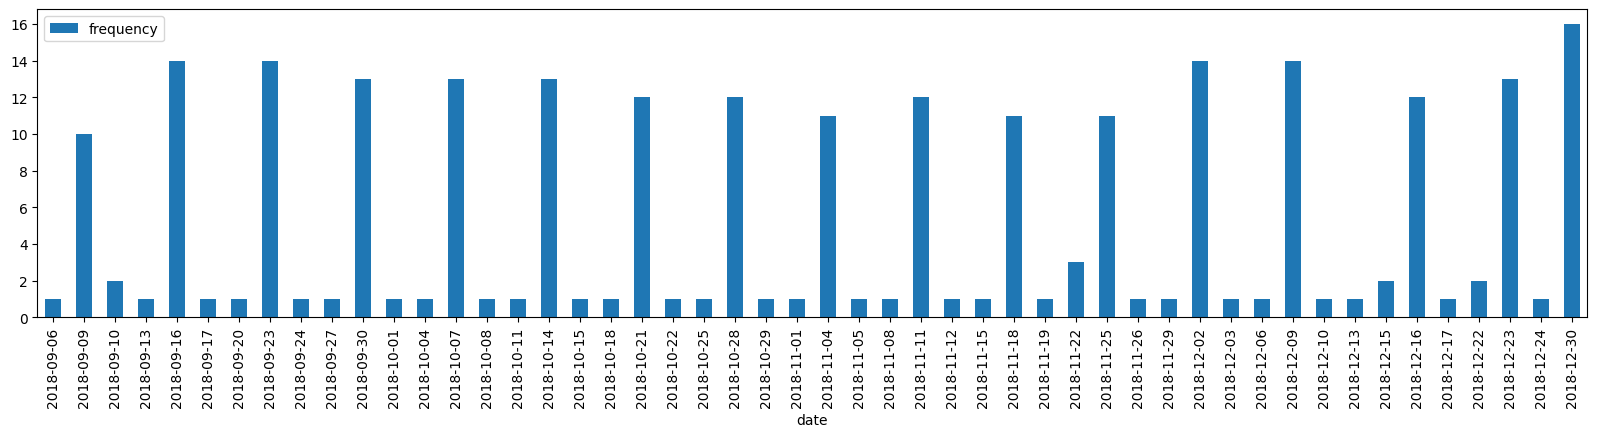

In [106]:
# Plotting a bar plot
sorted_date_dist.plot(kind='bar', figsize=(20,4))

**We can do the same analysis for the time, day and week as well. So, let us convert our code to a Python function.**

True

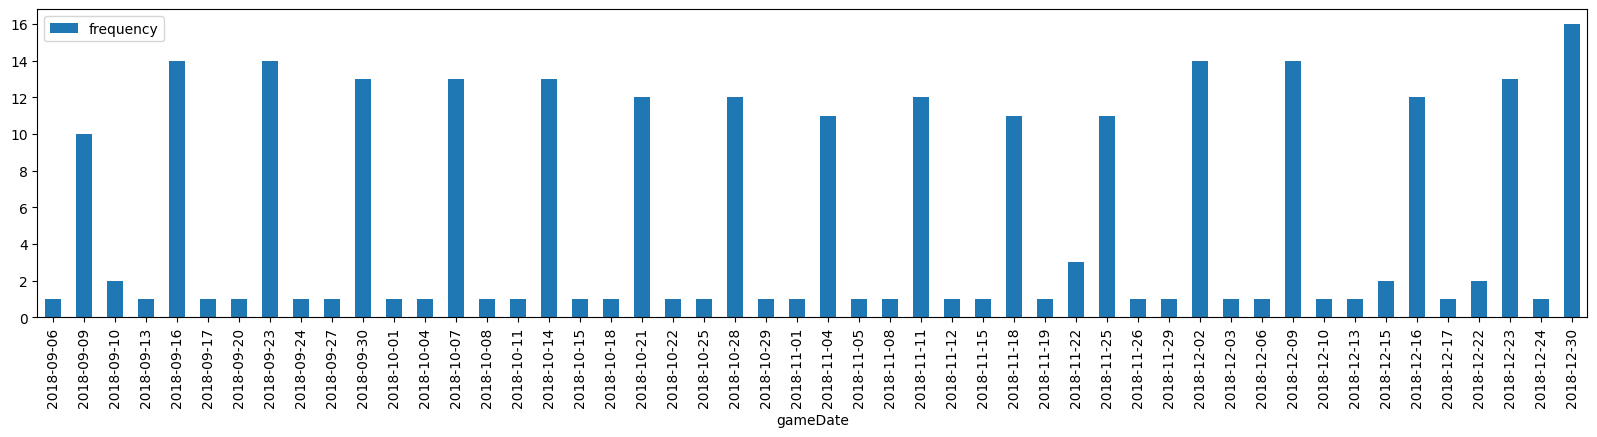

In [107]:
def find_dist(df, col_name):

    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()

    # Renaming the columns
    dist.columns = [col_name, 'frequency']

    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

# Visualizing the frequency distribution of games in relation to the date
find_dist(games_df, 'gameDate')

**Let us visualize the frequency distribution of games in relation to time and week number.**

In [108]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


True

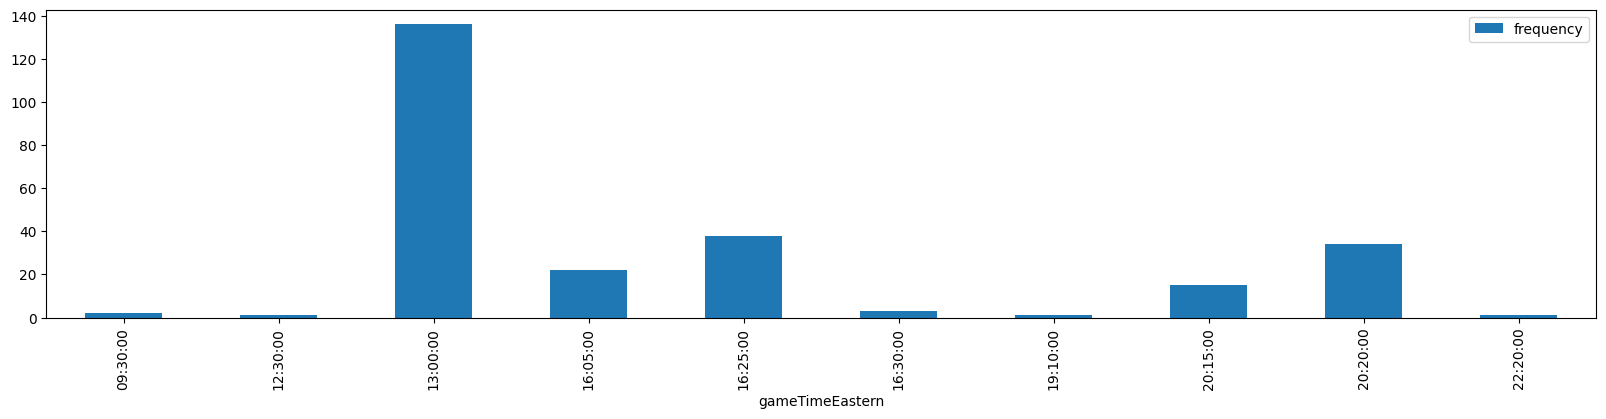

In [109]:
# Visualizing frequency distribution of games in relation to the time
find_dist(games_df, 'gameTimeEastern')

True

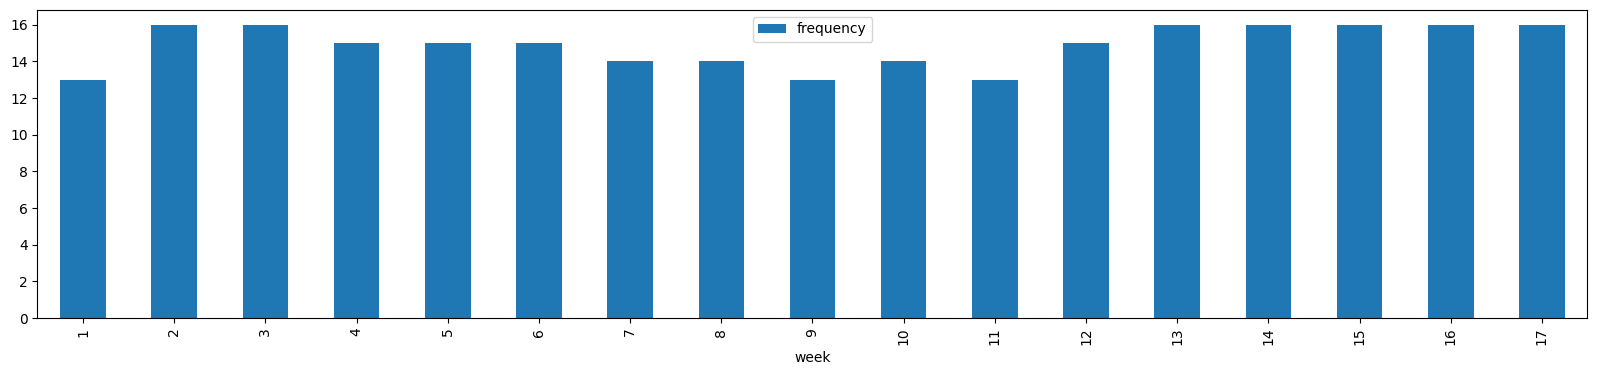

In [110]:
# Visualizing frequency distribution of games in relation to the week
find_dist(games_df, 'week')

**Finally, let us look at how the games are distributed in relation to the game days. For this, we will have to convert the dates to which day they fall in the week.**

In [111]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [112]:
# Creating a column containing the day of the week information extracted from the date
games_df['gameDay'] = games_df['gameDate'].apply(lambda x: x.strftime('%A'))

# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDay
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thursday
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sunday
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sunday
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sunday
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sunday


**Visualizing the game distribution in relation to the game day.**

True

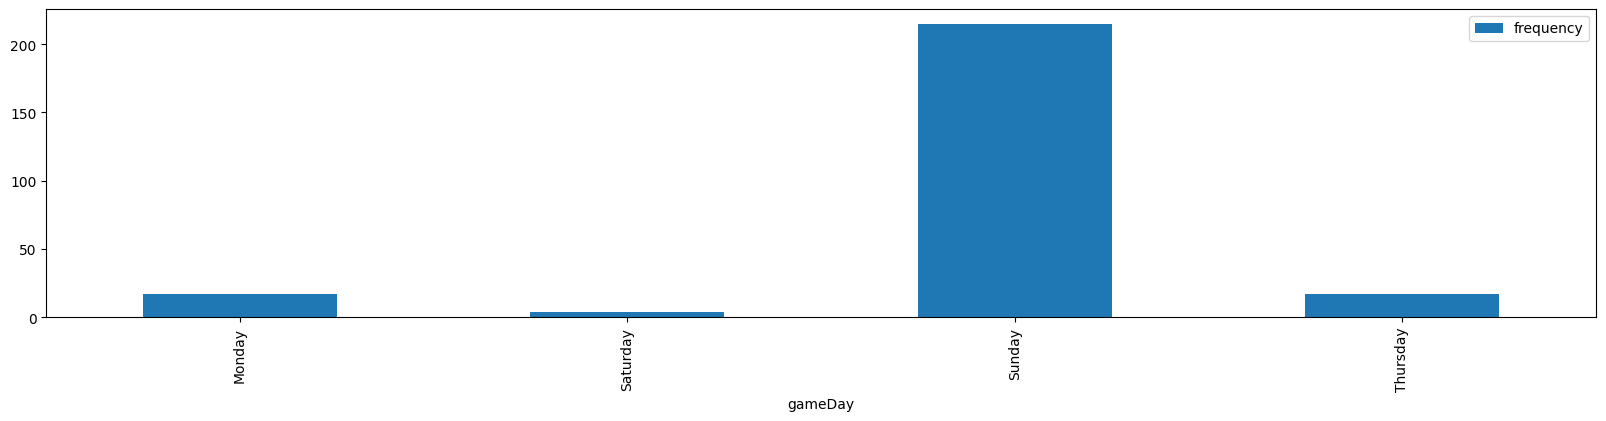

In [113]:
# Visualizing frequency distribution of games in relation to the day of the week
find_dist(games_df, 'gameDay')

# 2. Knowing the NFL players

The second dataset that we will be looking at is the one containing information about the NFL players. It gives us an idea about the physical attributes of players and distribution.

This dataset contains the following information:

- nflId: Player identification number, unique across players (numeric)

- height: Player height (text)

- weight: Player weight (numeric)

- birthDate: Date of birth (YYYY-MM-DD)

- collegeName: Player college (text)

- position: Player position (text)

- displayName: Player name (text)

In [114]:
# Reading in the CSV file as a DataFrame
players_df = pd.read_csv('/content/drive/MyDrive/Battle of The Brains/tech/players.csv')

In [115]:
# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [116]:
# Viewing the shape of the DataFrame, and number of data points
players_df.shape

(1303, 7)

**Converting the date columns to Pandas datetime values.**

In [117]:
# Converting to datetime.date values
players_df['birthDate'] = pd.to_datetime(players_df['birthDate']).dt.date

# Extracting the year
players_df['birthYear'] = pd.to_datetime(players_df['birthDate']).dt.year

# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


In [118]:
# Finding the age of the players with respect to NFL Players, to get  age distribution
players_df['age'] = 2018 - players_df['birthYear']

# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


**Using previous function to find the age distribution of the players easily.**

In [119]:
def find_dist(df, col_name):

    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()

    # Renaming the columns
    dist.columns = [col_name, 'frequency']

    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

True

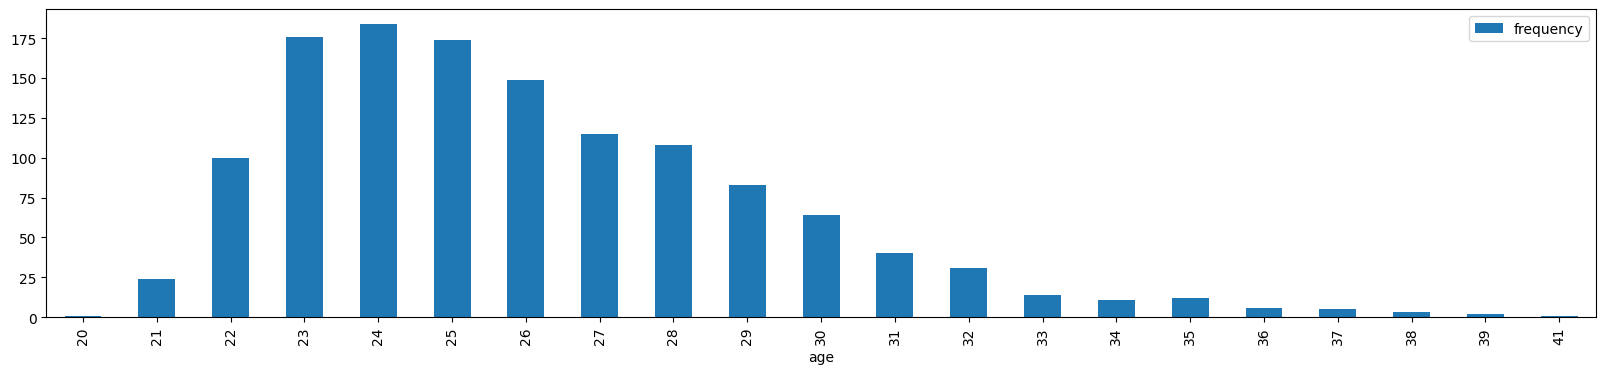

In [120]:
# Visualizing frequency distribution of players in relation to their age
find_dist(players_df, 'age')

**Next, let us also see how the players are distributed amongst different team positions.**

In [121]:
# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


True

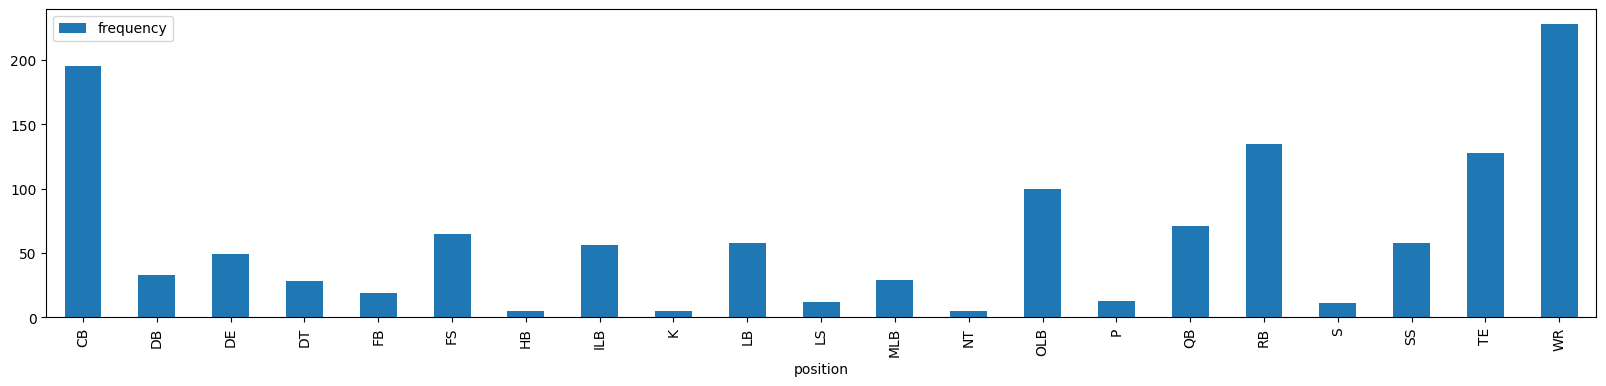

In [122]:
# Visualizing frequency distribution of players in relation to their positions
find_dist(players_df, 'position')

**Now, let us look at how the age distribution of players in the CB (Cornerback) and WR (Wide Receiver) positions.**

**For this, we can select the data points for either of the positions and then, find their age distribution.**

In [123]:
# Selecting position = CB
players_df.query('position == "CB"')

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
28,2552689,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24
29,2555383,72,191,1994-04-06,Louisiana State,CB,Jalen Mills,1994,24
...,...,...,...,...,...,...,...,...,...
1228,2561316,70,185,1996-02-02,Utah State,CB,Jalen Davis,1996,22
1241,2556371,72,200,1992-09-09,Texas A&M,CB,Brandon Williams,1992,26
1248,2558858,5-11,195,1994-06-25,Auburn,CB,Joshua Holsey,1994,24
1278,2558819,6-2,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24


True

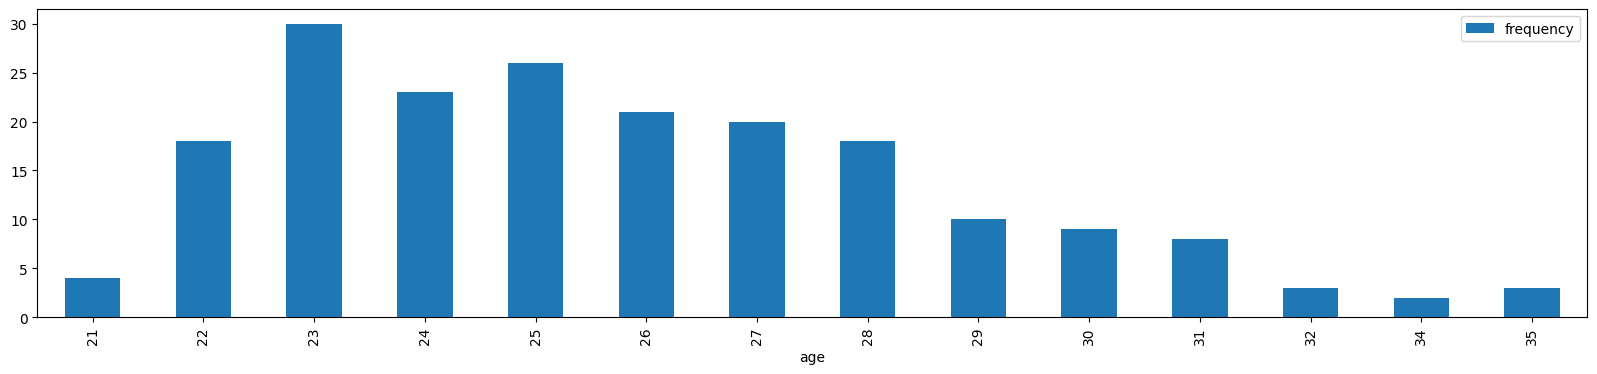

In [124]:
# Visualizing frequency distribution of players in relation to the CB position
find_dist(players_df.query('position == "CB"'), 'age')

True

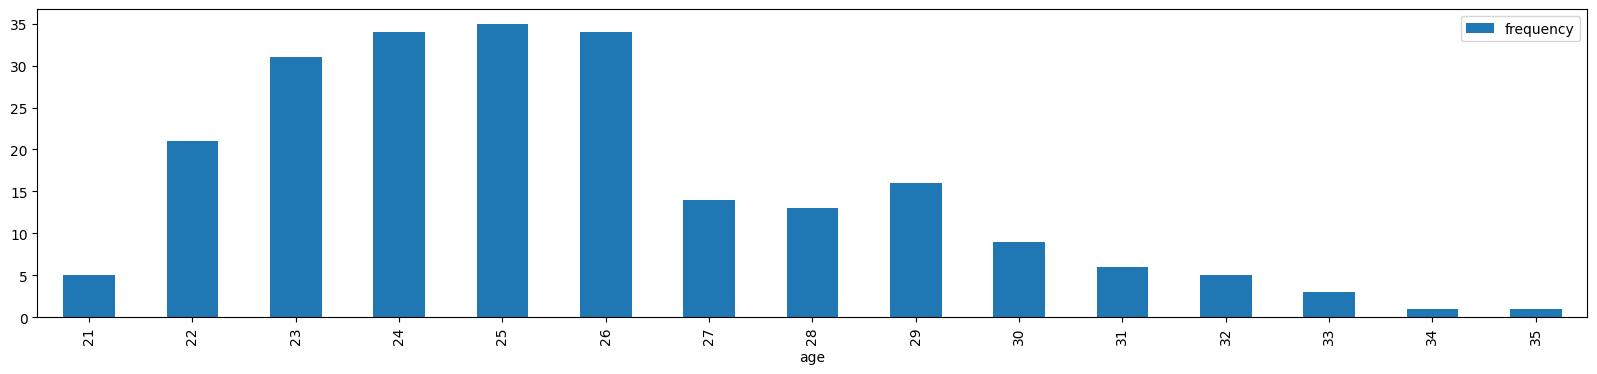

In [125]:
# Visualizing frequency distribution of players in relation to the WR position
find_dist(players_df.query('position == "WR"'), 'age')

**Now, let us look at the actual height and weight distribution of the players. However, their is some inconsistency in the data in the height column.**

In [126]:
# Looking at the first twenty rows
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


**Let us fix it by converting all datapoints to inches.**

In [127]:
# Fixing the inconsistency by converting all data to inches
players_df['height'] = players_df['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

# Looking at the first twenty rows
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,72,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


**Now, instead of looking at the height and weight distribution of players seperately, let us look at them together by making a joint plot.**

In [128]:
# Extracting the height values
players_df['height'].values

array([72, 70, 69, ..., 78, 69, 74])

In [129]:
# Assigning the height and weight values
height = players_df['height'].values
weight = players_df['weight'].values

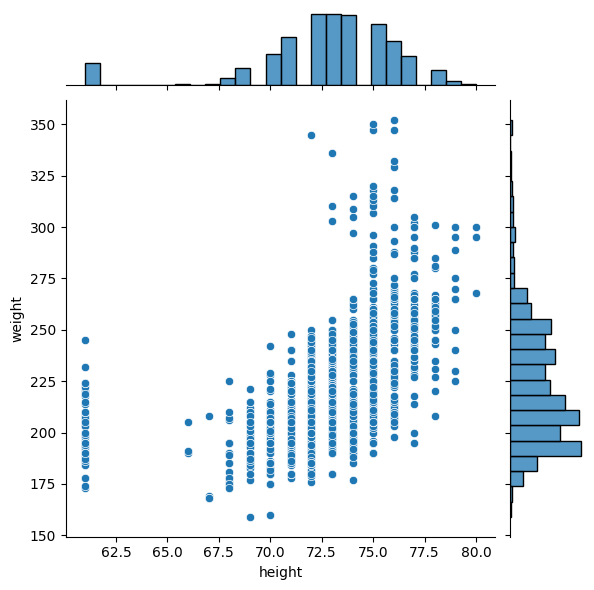

In [130]:
# Plotting a joint plot
sns.jointplot(x = "height", y = "weight", data=players_df, kind="scatter")
plt.show()

# 3. Understanding the NFL plays

The third dataset that we will be looking at is the dataset containing information about the plays in different NFL games. This would be helpful in uderstanding how the games are being paid and to give outr TouchdownAI users information about the game status.

The dataset cointains the following items:

- gameId: Game identifier, unique (numeric)

- playId: Play identifier, not unique across games (numeric)

- playDescription: Description of play (text)

- quarter: Game quarter (numeric)

- down: Down (numeric)

- yardsToGo: Distance needed for a first down (numeric)

- possessionTeam: Team on offense (text)

- playType: Outcome of dropback: sack or pass (text)

- yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)

- yardlineNumber: Yard line at line-of-scrimmage (numeric)

- offenseFormation: Formation used by possession team (text)

- personnelO: Personnel used by offensive team (text)

- defendersInTheBox: Number of defenders in close proximity to line-of-scrimmage (numeric)

- numberOfPassRushers: Number of pass rushers (numeric)

- personnelD: Personnel used by defensive team (text)

- typeDropback: Dropback categorization of quarterback (text)

- preSnapHomeScore: Home score prior to the play (numeric)

- preSnapVisitorScore: Visiting team score prior to the play (numeric)

- gameClock: Time on clock of play (MM:SS)

- absoluteYardlineNumber: Distance from end zone for possession team (numeric)

- penaltyCodes: NFL categorization of the penalties that ocurred on the play. For purposes of this contest, the most important penalties are Defensive Pass Interference (DPI), Offensive Pass Interference (OPI), Illegal Contact (ICT), and Defensive Holding (DH). Multiple penalties on a play are separated by a ; (text)

- penaltyJerseyNumber: Jersey number and team code of the player commiting each penalty. Multiple penalties on a play are separated by a ; (text)

- passResult: Outcome of the passing play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)

- offensePlayResult: Yards gained by the offense, excluding penalty yardage (numeric)

- playResult: Net yards gained by the offense, including penalty yardage (numeric)

- epa: Expected points added on the play, relative to the offensive team. Expected points is a metric that estimates the average of every next scoring outcome given the play's down, distance, yardline, and time remaining (numeric)

- isDefensivePI: An indicator variable for whether or not a DPI penalty ocurred on a given play (TRUE/FALSE)

In [131]:
# Reading in the CSV file as a DataFrame
plays_df = pd.read_csv('/content/drive/MyDrive/Battle of The Brains/tech/plays.csv')

In [132]:
# Looking at the first five rows
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [133]:
plays_df.shape

(19239, 27)

# 4. Visualizing the American Football Field

Now, we will be visualizing the American football field using Matplotlib. This section takes heavy inspiration from the work of [Rob Mulla](https://www.kaggle.com/robikscube/nfl-big-data-bowl-plotting-player-position/notebook).


In [134]:
import matplotlib.patches as patches

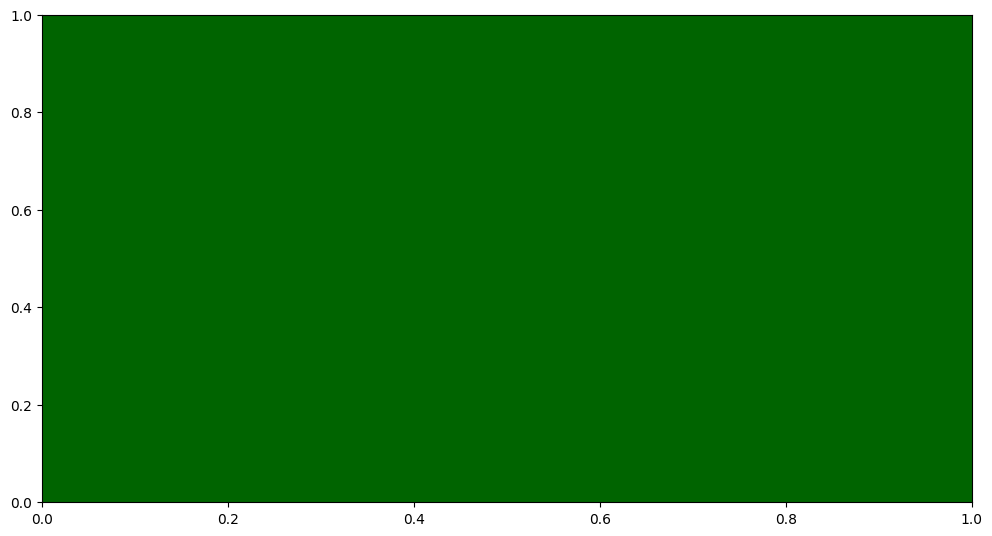

In [135]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

**Adding some lines on the field by using the plot() method.**

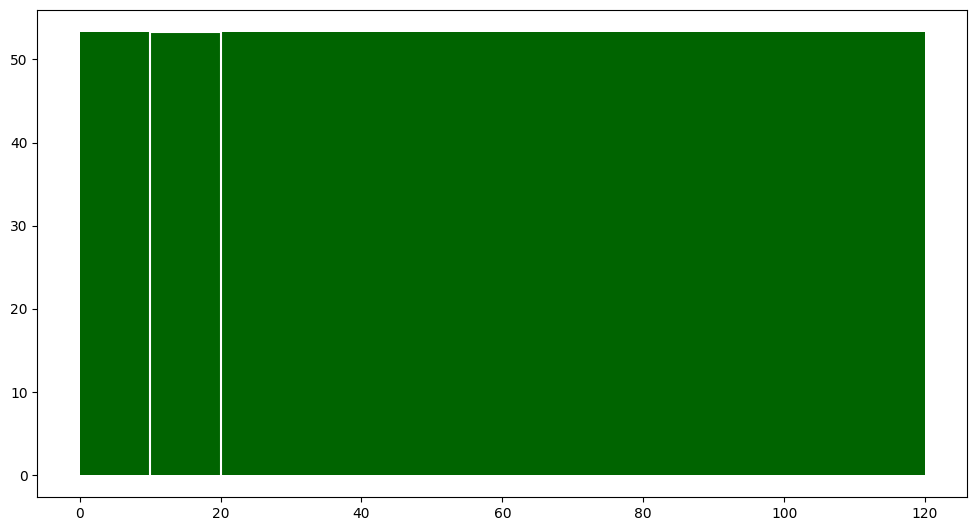

In [136]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20],
         [0, 53.3, 53.3, 0],
         color='white', zorder=0)

**Now let us create all the lines on the field.**

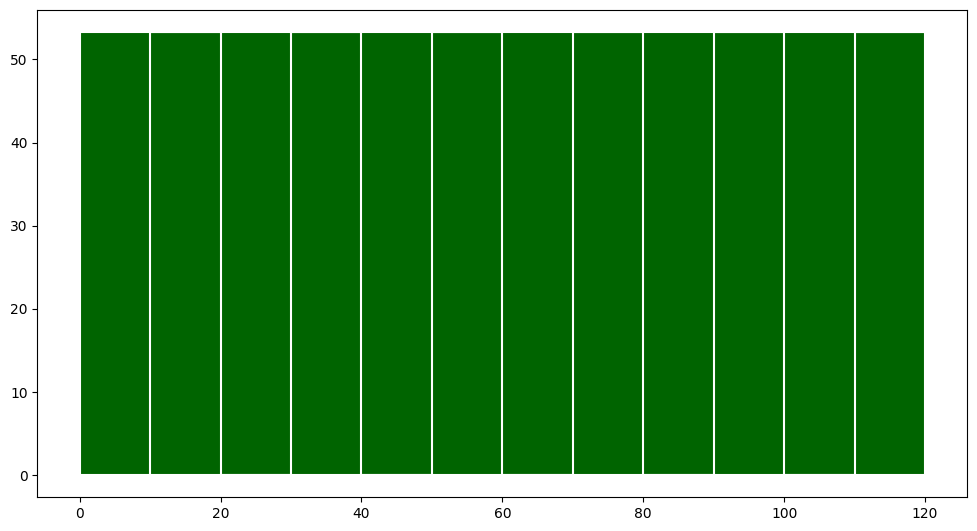

In [137]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3,
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

**Adding the endzones onto the plot.**

(0.0, 120.0, -5.0, 58.3)

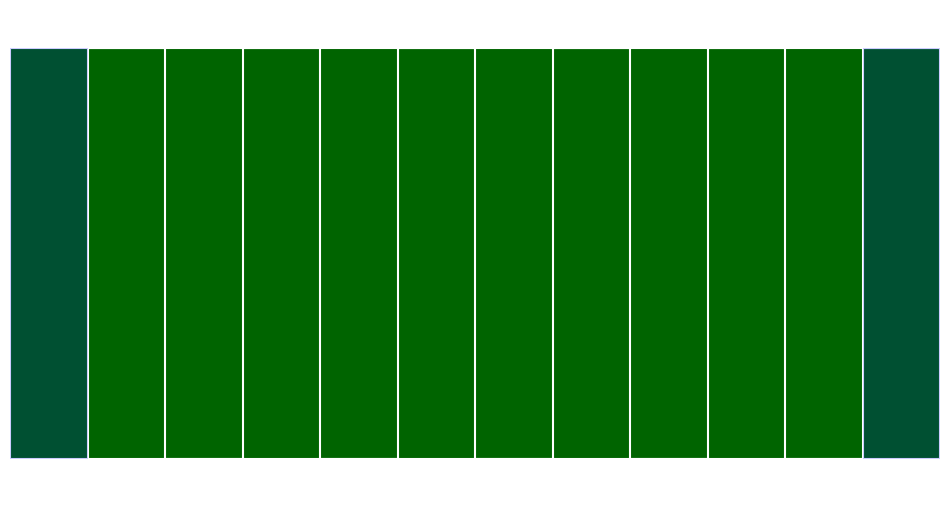

In [138]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3,
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
plt.axis('off')

**Plotting the numbers on the field.**

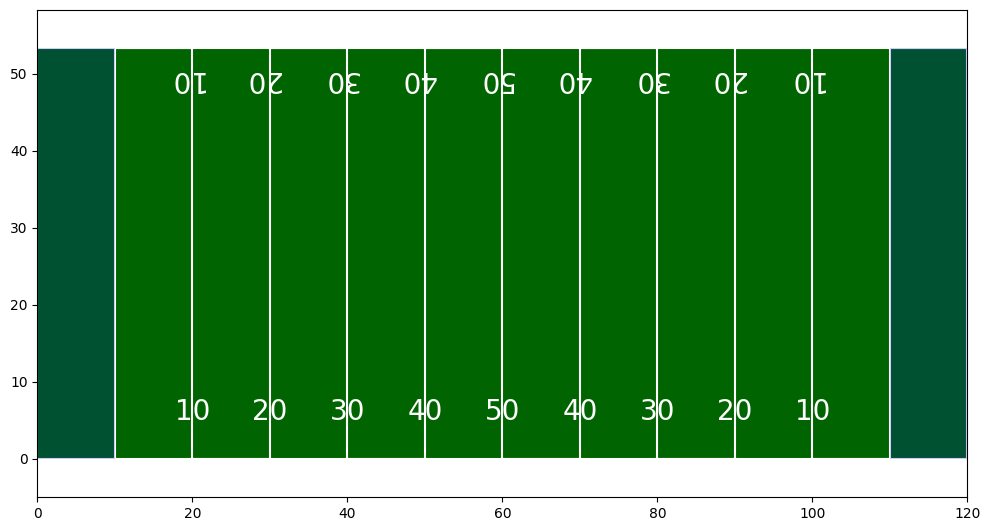

In [139]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3,
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
# plt.axis('off')

# Plotting the numbers starting from x = 20 and ending at x = 110
# with a step of 10
for x in range(20, 110, 10):

    # Intializing another variable named 'number'
    number = x

    # If x exceeds 50, subtract it from 120
    if x > 50:
        number = 120 - x

    # Plotting the text at the bottom
    plt.text(x, 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white')

    # Plotting the text at the top
    plt.text(x - 0.95, 53.3 - 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white',
             rotation=180)

**Let us finally create the ground markings and complete the plot.**

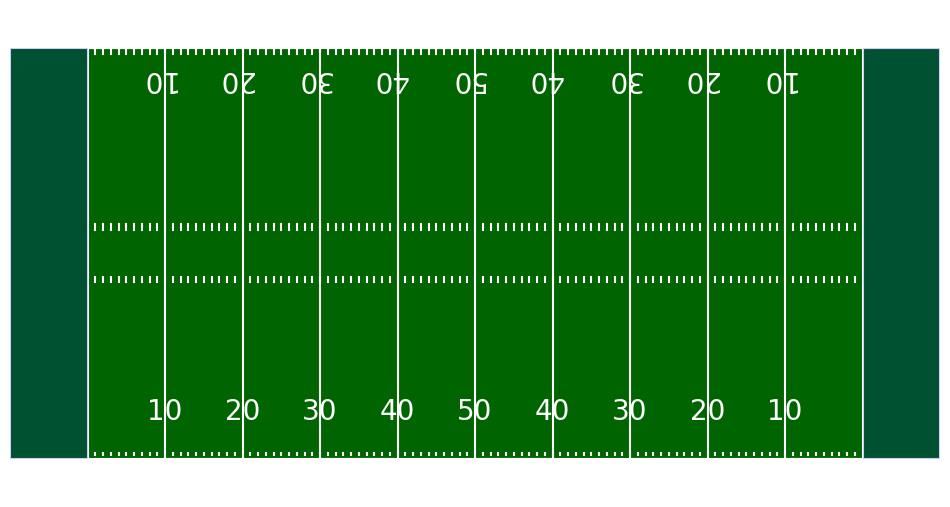

In [140]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3,
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
plt.axis('off')

# Plotting the numbers starting from x = 20 and ending at x = 110
# with a step of 10
for x in range(20, 110, 10):

    # Intializing another variable named 'number'
    number = x

    # If x exceeds 50, subtract it from 120
    if x > 50:
        number = 120 - x

    # Plotting the text at the bottom
    plt.text(x, 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white')

    # Plotting the text at the top
    plt.text(x - 0.95, 53.3 - 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white',
             rotation=180)

# Making ground markings
for x in range(11, 110):
        ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
        ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
        ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
        ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)

**Wrapping the entire code in a function for easy plotting**

In [141]:
def create_football_field():

    # Create a rectangle defined via an anchor point *xy* and its *width* and *height*
    rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

    # Creating a subplot to plot our field on
    fig, ax = plt.subplots(1, figsize=(12, 6.33))

    # Adding the rectangle to the plot
    ax.add_patch(rect)

    # Plotting a line plot for marking the field lines
    plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3,
              0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', zorder = 0)

    # Creating the left end-zone
    left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Creating the right end-zone
    right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Adding the patches to the subplot
    ax.add_patch(left_end_zone)
    ax.add_patch(right_end_zone)

    # Setting the limits of x-axis from 0 to 120
    plt.xlim(0, 120)

    # Setting the limits of y-axis from -5 to 58.3
    plt.ylim(-5, 58.3)

    # Removing the axis values from the plot
    plt.axis('off')

    # Plotting the numbers starting from x = 20 and ending at x = 110
    # with a step of 10
    for x in range(20, 110, 10):

        # Intializing another variable named 'number'
        number = x

        # If x exceeds 50, subtract it from 120
        if x > 50:
            number = 120 - x

        # Plotting the text at the bottom
        plt.text(x, 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')

        # Plotting the text at the top
        plt.text(x - 0.95, 53.3 - 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white',
                 rotation=180)

    # Making ground markings
    for x in range(11, 110):
            ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
            ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
            ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
            ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)

    # Returning the figure and axis
    return fig, ax

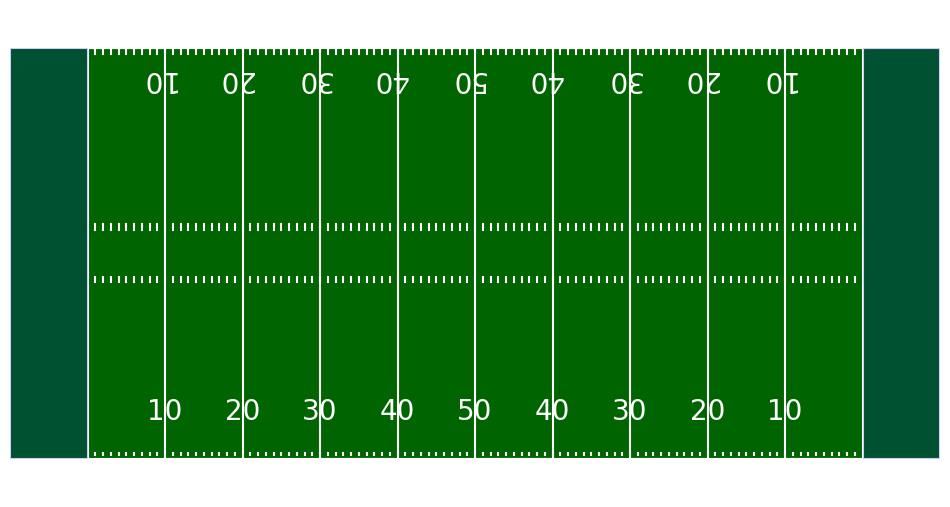

In [142]:
# Calling the plotting function
fig, ax = create_football_field()

# Plotting the figure
plt.show()

# 5. Adding Players onto the Field

The fourth dataset that we will be looking at is the dataset containing the tracking information of the players. Datasets like this will be useful for generating information the personal players, and will be useful for TouchdownAI.
This data will be visualised on the field built in the previous section.

This dataset contains the following information:

- time: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)

- x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)

- y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)

- s: Speed in yards/second (numeric)

- a: Acceleration in yards/second^2 (numeric)

- dis: Distance traveled from prior time point, in yards (numeric)

- o: Player orientation (deg), 0 - 360 degrees (numeric)

- dir: Angle of player motion (deg), 0 - 360 degrees (numeric)

- event: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)

- nflId: Player identification number, unique across players (numeric)

- displayName: Player name (text)

- jerseyNumber: Jersey number of player (numeric)

- position: Player position group (text)

- team: Team (away or home) of corresponding player (text)

- frameId: Frame identifier for each play, starting at 1 (numeric)

- gameId: Game identifier, unique (numeric)

- playId: Play identifier, not unique across games (numeric)

- playDirection: Direction that the offense is moving (text, left or right)

- route: Route ran by offensive player (text)

In [143]:
# Reading the data as a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Battle of The Brains/tech/week_data.csv')

In [144]:
# Looking at the first five rows of the DataFrame
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-11-16T01:24:15.799Z,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,2018-11-16T01:24:15.799Z,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,2018-11-16T01:24:15.799Z,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,2018-11-16T01:24:15.799Z,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,2018-11-16T01:24:15.799Z,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN


In [145]:
# Looking at the shape of the DataFrame
df.shape

(932240, 19)

In [146]:
# Converting to Time values
df['time'] = pd.to_datetime(df['time']).dt.time

# Looking at the first five rows of the DataFrame
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:24:15.799000,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,01:24:15.799000,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,01:24:15.799000,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,01:24:15.799000,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,01:24:15.799000,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN


In [147]:
# Sorting the values of the DataFrame by time in an ascending order to analyse each game by time.
df = df.sort_values(by='time', ascending=True).reset_index(drop=True)

# Looking at the first five rows of the DataFrame
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,00:00:38.500000,86.80,44.97,0.01,0.01,0.01,265.98,318.85,None,2552600.0,Nelson Agholor,13.0,WR,1,away,2018111809,3294,left,GO
1,00:00:38.500000,80.39,37.16,0.08,0.23,0.01,89.72,339.97,None,2552484.0,P.J. Williams,26.0,CB,1,home,2018111809,3294,left,NaN
2,00:00:38.500000,86.34,36.31,0.00,0.00,0.00,285.81,269.36,None,497326.0,Golden Tate,19.0,WR,1,away,2018111809,3294,left,SCREEN
3,00:00:38.500000,85.10,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111809,3294,left,NaN
4,00:00:38.500000,86.82,7.17,0.03,0.02,0.01,263.02,288.96,None,2560949.0,Josh Adams,33.0,RB,1,away,2018111809,3294,left,GO


**Let us select a specific gameId and playID to visualize the player positions within a specific game and play.**

In [158]:
# Selecting the data for the given game and play based on their Id
sel_df = df.query('gameId == 2018111900 and playId == 5337')

# Looking at the shape of the DataFrame
print(f'The shape of the DataFrame is: {sel_df.shape}')

# Looking at the DataFrame
sel_df

The shape of the DataFrame is: (812, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
278133,04:52:26.700000,39.48,29.41,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111900,5337,right,NaN
278134,04:52:26.700000,38.23,36.36,0.00,0.00,0.00,116.48,124.32,None,2558194.0,Josh Reynolds,83.0,WR,1,home,2018111900,5337,right,SCREEN
278135,04:52:26.700000,38.65,24.78,0.00,0.00,0.00,86.45,22.01,None,2555364.0,Tyler Higbee,89.0,TE,1,home,2018111900,5337,right,FLAT
278136,04:52:26.700000,42.79,36.47,0.21,0.27,0.02,285.67,62.16,None,2555349.0,Kendall Fuller,23.0,CB,1,away,2018111900,5337,right,NaN
278137,04:52:26.700000,38.41,29.41,0.00,0.00,0.00,98.81,325.15,None,2555334.0,Jared Goff,16.0,QB,1,home,2018111900,5337,right,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278940,04:52:32.400000,45.60,25.13,2.22,2.04,0.23,265.27,174.12,None,2543498.0,Brandin Cooks,12.0,WR,58,home,2018111900,5337,right,CROSS
278941,04:52:32.400000,43.76,52.13,3.69,4.66,0.39,148.43,21.23,None,2540169.0,Robert Woods,17.0,WR,58,home,2018111900,5337,right,CROSS
278942,04:52:32.400000,40.97,41.81,5.00,2.13,0.51,29.91,32.65,None,2530794.0,Ron Parker,38.0,FS,58,away,2018111900,5337,right,NaN
278943,04:52:32.400000,43.17,46.38,5.22,2.26,0.53,19.08,29.13,None,2495493.0,Justin Houston,50.0,OLB,58,away,2018111900,5337,right,NaN


**Now, let us seperate out the teams as well as the football in the data for plotting.**

In [159]:
# Selecting the home and away team
home_team = sel_df.query('team == "home"')
away_team = sel_df.query('team == "away"')

# Selecting the football
football = sel_df.query('team == "football"')

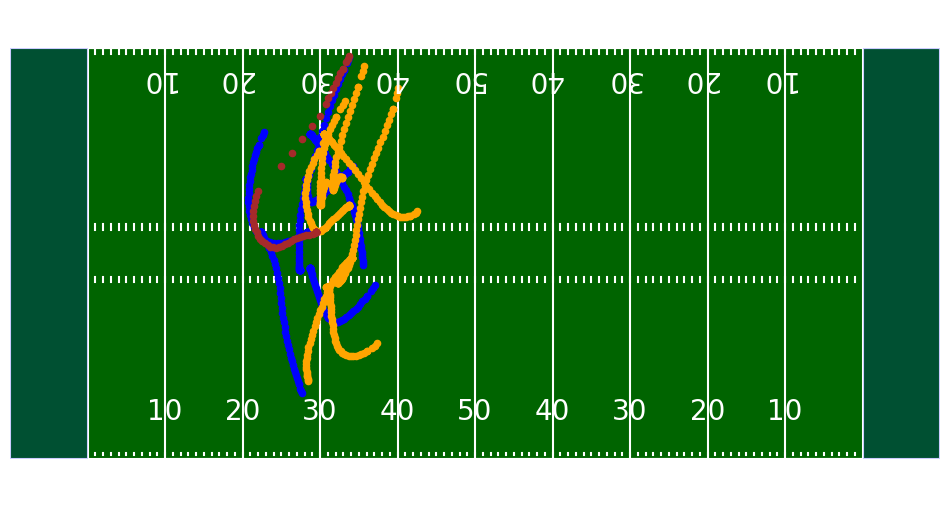

In [160]:
# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
home_team.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_team.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()

**We can also visualize a specific event by just selecting the event.**

In [161]:
sel_df['event'].unique()

array(['None', 'ball_snap', 'play_action', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'tackle'], dtype=object)

**Plotting the data for the event of ball_snap, that is, when the quarterback first receives the football**

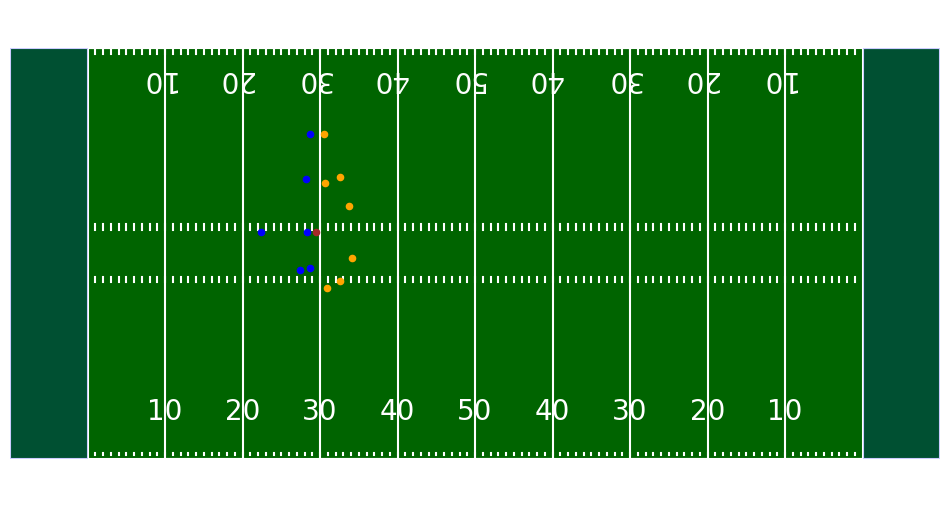

In [162]:
# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
home_team.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_team.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()

In this way, we can visualize any game, play and event on the football field. This will be useful to visualise what users would like to see in their NFL+ subscription, and displays how we can show this informaton in the user experience.